Universidad del Valle de Guatemala <br/>
Modelacion y Simulacion <br/>
Docente: Samuel Chavez <br/>
Semestre 2, 2020 <br/>

Dieter Esteban de Wit Torres 15146 <br/>
&nbsp;
&nbsp;

# Mini	proyecto 2
&nbsp;

In [2]:
# --- Import required libraries ---
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import os
import sys
import texttable as tt 

# --- Apply Global Styles to matplotlib graphs --- 
plt.style.use('seaborn-darkgrid')
%matplotlib inline

## Ejercicio	1 - Función	acumulada ponderada:

Suponiendo	que	es	simple	generar	variables	aleatorias	con	función	de	
probabilidad	acumulada	Fi(x)	para	i	de	1	a	n,	tenemos	V	(variable	aleatoria)	con	
función	de	probabilidad	acumulada:	


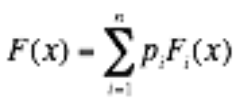

Donde	pi	constituye	una	distribución	probabilística.	

### Task 1: 

Describa un	algoritmo	para	generar	V

Implementación del **Algoritmo de Transformación Inversa**. Conocemos que al estar definida la funcion de distribución acumulada (F(x)), V es una variable aleatoria continua. 

```
def exp_density(x):
	# Función de densidad, se utiliza la función de distribución de una variable aleatoria exponencial
	return alpha*euler**(-alpha*x)
    
def Fi(x):
	# Función acumulada de la variable aleatoria exponencial
	return 1-euler**(-alpha*x)
    
def F(x):
	# Función de distribución acumulada variable aleatoria V
	normal_dist = random.normal
	return sumation(i,n){normal_dist*Fi(x)}
```

Esto asegura que la variable aleatoria X tiene una distribución como la describe F(x).

### Task 2: 

Demuestre	que	el	algoritmo	genera	adecuadamente	V

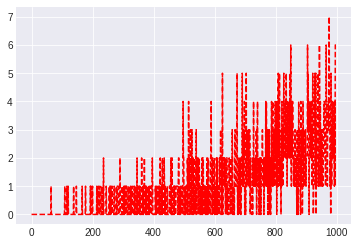

In [76]:
def Fi(alpha, x):
    return x**2

n = 1000
probability = []

for i in range(n - 1):
    probability.append(Fi(-0.5, i))

results = np.arange(1, n)

probability = np.asarray(probability)
cummulative_probability = np.cumsum(probability/float(sum(probability)))

R = np.random.uniform(0, 1, n)

V = [int(results[np.argwhere(cummulative_probability == min(cummulative_probability[(cummulative_probability - r) > 0]))]) for r in R]

V = ((np.array(V) - 1) / 1).astype(int)
times = np.arange(1, n, 1)
lc = np.bincount(V, minlength=len(times))

plot1 = plt.plot(lc, 'r--', label='V')
plt.show()

## Ejercicio	2	– Función	acumulada	ponderada	(programa):

Escriba	un	programa	tal	que,	dada	una	función	de	masa	de	probabilidad	(pi,	para	i	de	1	a	n),	proporcione	como	salida	el	valor	de	una	variable	aleatoria	con	esta	función	de	masa.	Haga	un	histograma	para	alguna	distribución	de	ejemplo.

(array([1., 0., 0., 0., 0., 2., 0., 0., 1., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

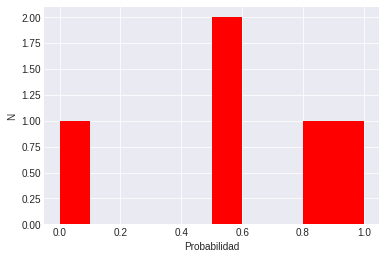

In [2]:
dist = {
    1: lambda n: "n0",
    0.5: lambda n: "n1",
    0.8: lambda n: "n2",
    0.6: lambda n: "n3"
}

probability = [0]
results = []
probability += list(dist.keys())

for x in range(0, 1000):
    num = random.random()
    for i in range(0, len(probability) - 1):
        if probability[i] <= num < probability[i + 1]:
            results.append(probability[i + 1])

plt.xlabel('Probabilidad')
plt.ylabel('N')
plt.hist(probability, color='red')

## Ejercicio	3	– Valor	presente	neto:

Usted	es	un	gerente	de	proyecto	en	Inversiones	Gruesas	S.	A.	Y	debe	elegir	entre dos	proyectos a realizar,	la	construcción	de	un	Hotel	o	la	construcción	de	un	Centro	Comercial.	Los	flujos	de caja	esperados	para	cada	proyecto	son	los	siguientes:

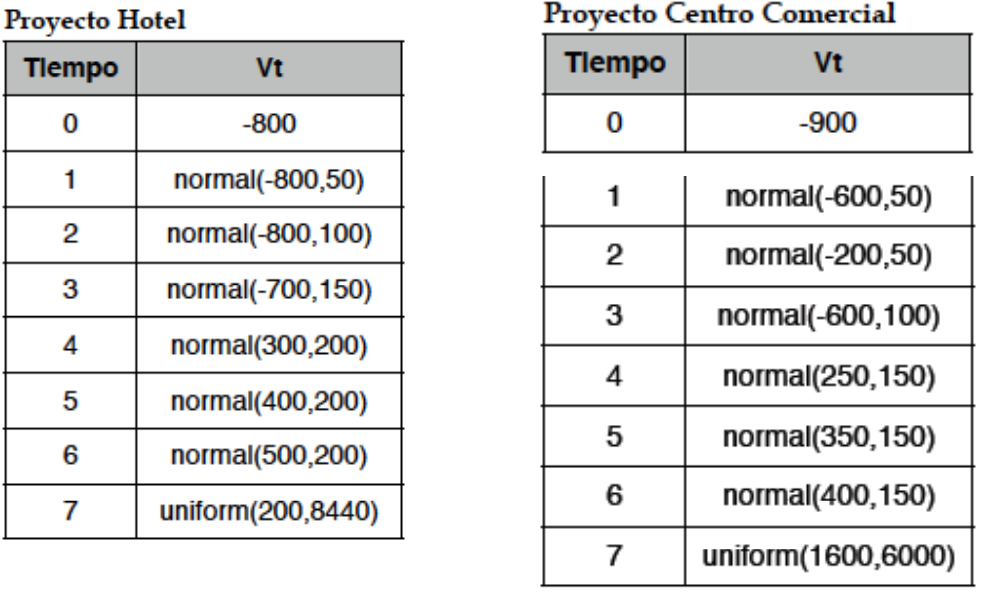

Si	el	parámetro	que	quiere	utilizar	para	comparar	ambos	proyectos	es	el	Valor	Presente	Neto	al	10%	de	costo	de	capital,	considere:

### Task 1:

Realice	tres	simulaciones	para	determinar	cuál	de	los	proyectos	es	el	más	rentable.	Utilice	100,	1000	y	10000	iteraciones

In [ ]:
def normal(x, y):
    while True:
        y1 = -math.log(random.random(), math.exp(1))
        y2 = -math.log(random.random(), math.exp(1))
        if (y2 - (y1 - 1) ** 2) / 2 > 0:
            random_var = random.random()
            if random_var <= 0.5:
                return x + y * y1
            else:
                return x - y * y1


def uniform(x, y):
    random_var = random.random()
    result = (y - x) * random_var + x
    return result


def calculate_vpn(table_value, discount):
    vpn = 0
    for period in range(0, len(table_value)):
        vpn = vpn + table_value[period] / ((1 + discount) ** period)
    return vpn


def calculate_profitable(n):
    percentage = 0.1
    hotel_value = 0
    cc_value = 0
    for i in range(n):
        hotel = [-800, normal(-800, 50), normal(-800, 100), normal(-700, 150), normal(300, 200), normal(400, 200),
                 normal(500, 200), uniform(200, 8440)]
        cc = [-900, normal(-600, 50), normal(-200, 50), normal(-600, 100), normal(250, 150),
              normal(350, 150), normal(400, 150), uniform(1600, 6000)]
        hotel_value = hotel_value + calculate_vpn(hotel, percentage)
        cc_value = cc_value + calculate_vpn(cc, percentage)

    print("VPN Hotel: " + str(hotel_value / n))
    print("VPN Centro Comercial: " + str(cc_value / n) + "\n")


def main():
    menu()


def menu():
    n = input("Ingrese el numero de iteraciones que desea realizar: \n")
    try:
        calculate_profitable(int(n))
        menu()
    except ValueError:
        print("Error!")
        menu()


main()

Ingrese el numero de iteraciones que desea realizar: 
10
VPN Hotel: 28.123929285471924
VPN Centro Comercial: 712.1580192582306

Ingrese el numero de iteraciones que desea realizar: 
100
VPN Hotel: 452.4245781190976
VPN Centro Comercial: 550.8448845406788

Ingrese el numero de iteraciones que desea realizar: 
1000
VPN Hotel: 197.5545863044409
VPN Centro Comercial: 498.6814100997047

Ingrese el numero de iteraciones que desea realizar: 
10000
VPN Hotel: 246.75022142549105
VPN Centro Comercial: 502.4166679653642

Ingrese el numero de iteraciones que desea realizar: 
100000
VPN Hotel: 238.57449650255856
VPN Centro Comercial: 501.93569151817985



## Ejercicio	4	– Repartidor	de	periódicos:

Usted	es	un	voceador	que	quiere	saber	si	le	conviene	más	comprar	diariamente	9,	10	u	11	periódicos.	Además,	sabe	que	el	30%	de	los	días	le	piden	9,	el	40%	de	los	días	le	piden	10	y	el	30%	de	los	días	le	piden	11.	Si	usted	compra	los	periódicos	para	luego	venderlos, y	paga	$1.50	por	periódico,	lo	vende	a	$2.50,	y	por	cada	periódico	no	vendido	se	le	reembolsa	$0.50,	¿cuál	es	la	cantidad	que	más	le	conviene	comprar	todos	los	días?	Simule	para	un	mes,	un	año	y	diez	años.

In [3]:
def deliverer(n, days):
    papers = -(1.5 * n * days)
    for i in range(0, days):
        x = random.random()
        if x < 0.3:
            papers = papers + 2.5 * n
        elif 0.3 < x < 0.7:
            papers = papers + 2.5 * n
            if n == 11:
                papers = papers - 2.5
        else:
            papers = papers + 2.5 * n
            if n != 9:
                papers = papers - 0.5 * (n - 9)
    return papers


tab = tt.Texttable()
headings = ['n', 'Mes', 'Año', '10 Años']
tab.header(headings)
n = ['9', '10', '11']
mes = [(str(deliverer(9, 30))), (str(deliverer(10, 30))), (str(deliverer(11, 30)))]
year = [(str(deliverer(9, 365))), (str(deliverer(10, 365))), (str(deliverer(11, 365)))]
decade = [(str(deliverer(9, 3650))), (str(deliverer(10, 3650))), (str(deliverer(11, 3650)))]

for row in zip(n, mes, year, decade):
    tab.add_row(row)

print(tab.draw() + "\n")

print("Promedio:")
nine = (deliverer(9, 30) + deliverer(9, 365) + deliverer(9, 3650)) / 3
print("9: " + str(nine))
ten = (deliverer(10, 30) + deliverer(10, 365) + deliverer(10, 3650)) / 3
print("10: " + str(ten))
eleven = (deliverer(11, 30) + deliverer(11, 365) + deliverer(11, 3650)) / 3
print("11: " + str(eleven))

print("----------------------------------")
if nine > ten and nine > eleven:
    print(" 9 es la mejor opcion")
if ten > nine and ten > eleven:
    print(" 10 es la mejor opcion")
if eleven > nine and eleven > ten:
    print(" 11 es la mejor opcion")
print("----------------------------------")

+----+---------+----------+---------+
| n  |   Mes   |   Año    | 10 Años |
+====+=========+==========+=========+
| 9  | 270     | 3285     | 32850   |
+----+---------+----------+---------+
| 10 | 295.500 | 3597     | 35959   |
+----+---------+----------+---------+
| 11 | 289.500 | 3552.500 | 35388   |
+----+---------+----------+---------+

Promedio:
9: 12135.0
10: 13287.0
11: 13098.666666666666
----------------------------------
 10 es la mejor opcion
----------------------------------
